# <a id='toc1_'></a>[Lab CA: Correspondence Analysis (CA) using prince on the French_elections dataset](#toc0_)
Lab Duration: 2-3 Hours 
Prerequisites: Basic understanding of Python, Pandas, Matplotlib, and Correspondence Analysis (CA) 
 
Lab Objectives 

By the end of this lab, students will be able to: 

1. Perform CA using the prince library. 
2. Show and interpret the eigenvalues, explained variance and cumulative explained variance. 
3. Get the new coordinates for rows (Row scores) and columns (Column scores) and show the data 
in the new Factor map. 
4. Get and interpret the column/row contributions to the total explained variance of each 
dimension.   
5. Know the quality of representation of each point in the factor map. 

**Table of contents**<a id='toc0_'></a>    
- [Lab CA: Correspondence Analysis (CA) using prince on the French_elections dataset](#toc1_)    
  - [Part 1: Introduction to CA and the French Elections Voting Data](#toc1_1_)    
  - [Part 2: Setting up the Environment and Loading Data](#toc1_2_)    
    - [Step 2: Load the Dataset and display its first 5 rows](#toc1_2_1_)    
  - [Part 3: Performing CA using prince](#toc1_3_)    
    - [Step 1: Initialize the CA Model](#toc1_3_1_)    
    - [Step 2: Fit the CA Model](#toc1_3_2_)    
    - [Step 3: Transforming the data and getting the new columns and rows coordinates](#toc1_3_3_)    
  - [Part 4: Visualization & Interpretation](#toc1_4_)    
    - [1st visualization: Biplot showing the row and column factor maps:](#toc1_4_1_)    
    - [2nd visualization: How can we change the above parameters to get the following column factor map?](#toc1_4_2_)    
    - [Displaying the contributions of columns to the 1st dimension in a barplot:](#toc1_4_3_)    
    - [Displaying the contributions of rows to the 1st dimension in a barplot:](#toc1_4_4_)    
    - [Getting the quality representation of each point in the 1st dimension:](#toc1_4_5_)    
      - [- Cosine similarities of Columns (Candidates):](#toc1_4_5_1_)    
  - [Part 5: Conclusions & QA](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Part 1: Introduction to CA and the French Elections Voting Data](#toc0_)

CA Overview 

Correspondence Analysis (CA)  
 - Correspondence analysis is a useful data visualization technique for finding out and displaying the relationship between categories. It uses a graph that plots data, visually showing the outcome of two or more data points. 
 - CA uses a contingency tablea table of frequenciesthat shows how the categories of the variables are distributed. The data in the table undergoes a series of transformations in relation 
to the data around it to produce relational data. The resulting data is then plotted to show those relationships visually. 

The French Elections Voting Dataset 
 - This dataset counts the number of voters per region for each candidate in the 2022 French presidential elections. It can be used directly for correspondence analysis.  
 - The dataset's name in this context is usually French Elections Voting Data, and it consists of a contingency table where the rows represent the regions or departments, and the columns represent the candidates. Each cell in the table holds the number of votes for a particular candidate in a specific region. 

In [23]:
!pip install prince pandas seaborn matplotlib scikit-learn

In [24]:
import pandas as pd
import prince
import seaborn as sns
import matplotlib.pyplot as plt

## <a id='toc1_2_'></a>[Part 2: Setting up the Environment and Loading Data](#toc0_)

### <a id='toc1_2_1_'></a>[Step 2: Load the Dataset and display its first 5 rows](#toc0_)

In [25]:
dataset= prince.datasets.load_french_elections()
dataset.head()

candidate,Arthaud,Dupont-Aignan,Hidalgo,Jadot,Lassalle,Le Pen,Macron,Mélenchon,Poutou,Pécresse,Roussel,Zemmour,Abstention,Blank
region,,,,,,,,,,,,,,
Auvergne-Rhône-Alpes,23137,98465,77570,224735,136436,943294,1175085,897434,30596,217906,96409,312916,1228490,70084
Bourgogne-Franche-Comté,10643,38691,26543,60235,49557,409639,394117,277899,12737,76654,33932,107057,456682,26381
Bretagne,12965,35116,43596,122198,58653,385393,647172,407527,19913,92808,51193,96984,543425,31867
Centre-Val de Loire,9256,31759,23162,54401,38659,347845,383851,251259,11226,71690,33590,88575,459528,23216
Corse,455,2600,1589,4801,15408,42283,26795,19779,1374,9363,4553,18936,90636,2521


**Question: what do you think about the format of dataset ?**

This dataset is already available as a contingency matrix. It's more common to have at one's disposal a flat dataset. If this is the case, a contingency matrix can be obtained using the `pivot_table` function in pandas.

## <a id='toc1_3_'></a>[Part 3: Performing CA using prince](#toc0_)

### <a id='toc1_3_1_'></a>[Step 1: Initialize the CA Model](#toc0_)

In [26]:
ca = prince.CA(n_components=2,
               n_iter=3,
               copy=True,
               check_input=True,
               engine='sklearn',
               random_state=42)

**Q. Explain the main parameters ?**

* `n_components`: The number of dimensions to keep after the CA transformation (default is 2).
* `n_iter`: The number of iterations for the power iteration algorithm (default is 3).
* `copy`: Whether to copy the input data or modify it in place (default is True).
* `check_input`: Whether to check the input data for validity (default is True).
* `engine`: The engine to use for the computation ('auto', 'sklearn', or 'eigen' - default is 'auto').
* `random_state`: The seed for the random number generator (default is None).

### <a id='toc1_3_2_'></a>[Step 2: Fit the CA Model](#toc0_)

In [27]:
ca = ca.fit(dataset)

In [29]:
# Print eigenvalues, explained variance and total inertia of ca
print(ca.eigenvalues_summary)
print(ca.total_inertia_)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.021        40.82%                     40.82%
1              0.018        36.15%                     76.97%
0.051157489202723866


**Q. How is the percentage of explained variance calculated for each component?**

The percentage of explained variance for each component is calculated by dividing the eigenvalue of that component by the total inertia and multiplying by 100.

### <a id='toc1_3_3_'></a>[Step 3: Transforming the data and getting the new columns and rows coordinates](#toc0_)

In [33]:
# Get the rows (regions) and columns (candidates) coordinates.
row_coordinates = ca.row_coordinates(dataset)
col_coordinates = ca.column_coordinates(dataset)

**Note that there is no `ca.transform()` as `ca.row_coordinates()` and `ca.column_coordinates()` already do the transformation.**

In [34]:
# Dispaly the row coordinates.

print(row_coordinates.head())
print(col_coordinates.head())

                                0         1
region                                     
Auvergne-Rhône-Alpes    -0.058638  0.038303
Bourgogne-Franche-Comté -0.070815 -0.077604
Bretagne                -0.083655  0.110491
Centre-Val de Loire     -0.024624 -0.055799
Corse                    0.127370 -0.281755
                      0         1
candidate                        
Arthaud       -0.034732 -0.091291
Dupont-Aignan -0.094708 -0.064696
Hidalgo       -0.137897  0.052846
Jadot         -0.126228  0.188836
Lassalle      -0.271867 -0.091407


## <a id='toc1_4_'></a>[Part 4: Visualization & Interpretation](#toc0_)

We can use the `plot()` function of prince library or use matplotlib (as we did in the PCA lab):

### <a id='toc1_4_1_'></a>[1st visualization: Biplot showing the row and column factor maps:](#toc0_)

In [61]:
ca.plot(
     dataset,
     x_component=0,
     y_component=1,
     show_row_markers=True,
     show_column_markers=True,
     show_row_labels=False,
     show_column_labels=False
 )


alt.LayerChart(...)

**Q1. Explain the different parameters?**

* `dataset`: The input data.
* `x_component`: The component to plot on the x-axis (default is 0).
* `y_component`: The component to plot on the y-axis (default is 1).
* `show_row_labels`: Whether to show the row labels (default is True).
* `show_col_labels`: Whether to show the column labels (default is True).
* `show_row_markers`: Whether to show markers for the rows on the plot (default is True)
* `show_column_markers`: Whether to show markers for the columns on the plot (default is True)

**Q2. What do these factor maps show?**

These factor maps show the relationships between the rows (regions) and columns (candidates) in the reduced dimensional space. The closer two points are on the map, the more similar they are in terms of their voting patterns. The further apart two points are, the more dissimilar they are.

### <a id='toc1_4_2_'></a>[2nd visualization: How can we change the above parameters to get the following column factor map?](#toc0_)

In [58]:
ca.plot(
    dataset,
    x_component=0,
    y_component=1,
    show_row_markers=False,
    show_column_markers=False,
    show_row_labels=False,
    show_column_labels=True
)

alt.LayerChart(...)

To get the column factor map only, we set `show_row_labels=False`.

### <a id='toc1_4_3_'></a>[Displaying the contributions of columns to the 1st dimension in a barplot:](#toc0_)

In [86]:
column_distribution = ca.column_contributions_
column_distribution

,0,1
Arthaud,0.000241,0.001879
Dupont-Aignan,0.006569,0.003462
Hidalgo,0.011761,0.001950
Jadot,0.025909,0.065474
Lassalle,0.083044,0.010600
Le Pen,0.113773,0.436145
Macron,0.109747,0.115138
Mélenchon,0.063799,0.232358
Poutou,0.004193,0.000031
Pécresse,0.006680,0.051324


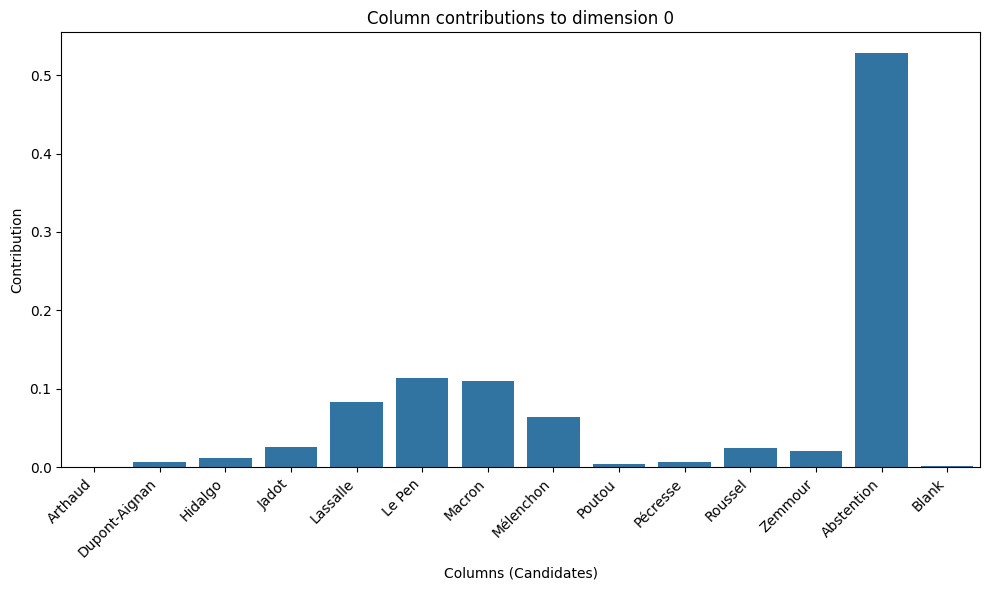

In [85]:
# Plot the column contributions
plt.figure(figsize=(10, 6))
sns.barplot(x=column_distribution[0].index, y=column_distribution[0].values)
plt.title('Column contributions to dimension 0')
plt.xlabel('Columns (Candidates)')
plt.ylabel('Contribution')
plt.xticks(rotation=45, ha='right') # Rotate the x labels for better readability
plt.tight_layout()
plt.show()

### <a id='toc1_4_4_'></a>[Displaying the contributions of rows to the 1st dimension in a barplot:](#toc0_)

In [87]:
row_distribution = ca.row_contributions_
row_distribution

,0,1
Auvergne-Rhône-Alpes,0.019543,0.009416
Bourgogne-Franche-Comté,0.010205,0.013838
Bretagne,0.018324,0.036096
Centre-Val de Loire,0.001139,0.006602
Corse,0.004018,0.022202
Grand Est,0.000714,0.075687
Guadeloupe,0.215242,0.002738
Guyane,0.087030,0.004523
Hauts-de-France,0.000820,0.177502
La Réunion,0.222707,0.012329


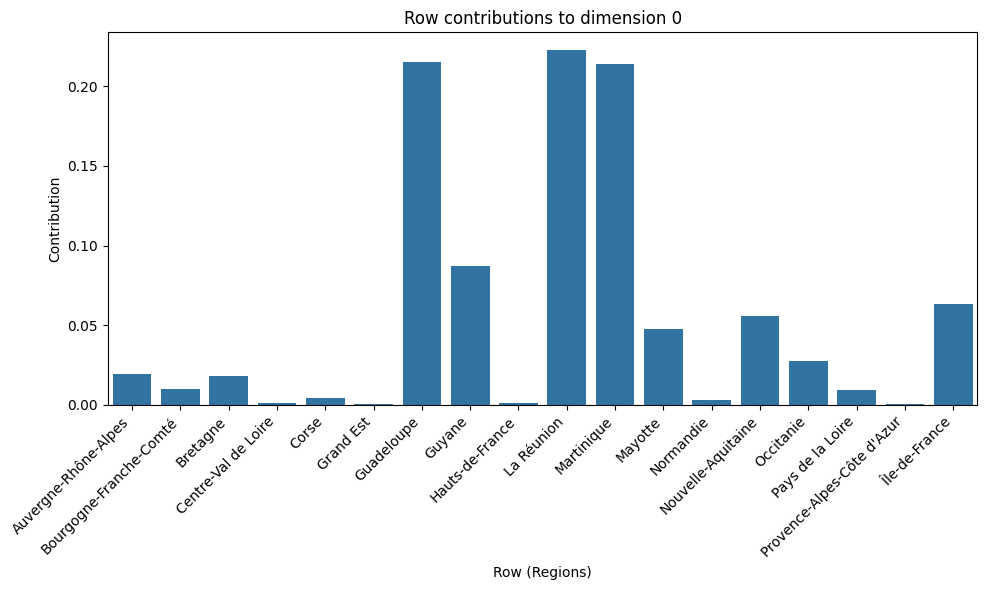

In [95]:
# Plot the row contributions
plt.figure(figsize=(10, 6))
sns.barplot(x=row_distribution[0].index, y=row_distribution[0].values)
plt.title('Row contributions to dimension 0')
plt.xlabel('Row (Regions)')
plt.ylabel('Contribution')
plt.xticks(rotation=45, ha='right') # Rotate the x labels for better readability
plt.tight_layout()
plt.show()

### <a id='toc1_4_5_'></a>[Getting the quality representation of each point in the 1st dimension:](#toc0_)

#### <a id='toc1_4_5_1_'></a>[- Cosine similarities of Columns (Candidates):](#toc0_)

In [91]:
# Get the quality of representation of each point (rows and columns) in the reduced space. Higher values indicate that a point is well represented on the selected dimensions.
ca.row_cosine_similarities(dataset), ca.column_cosine_similarities(dataset)


(                                   0         1
 region                                        
 Auvergne-Rhône-Alpes        0.568331  0.242500
 Bourgogne-Franche-Comté     0.365626  0.439086
 Bretagne                    0.212706  0.371061
 Centre-Val de Loire         0.076356  0.392078
 Corse                       0.066825  0.327001
 Grand Est                   0.007934  0.744332
 Guadeloupe                  0.962908  0.010847
 Guyane                      0.905915  0.041692
 Hauts-de-France             0.003871  0.741821
 La Réunion                  0.926371  0.045415
 Martinique                  0.945297  0.009543
 Mayotte                     0.681247  0.224475
 Normandie                   0.095694  0.347008
 Nouvelle-Aquitaine          0.415059  0.000547
 Occitanie                   0.211334  0.037977
 Pays de la Loire            0.130176  0.215042
 Provence-Alpes-Côte d'Azur  0.003383  0.293665
 Île-de-France               0.113246  0.850505,
                       0         1
 can

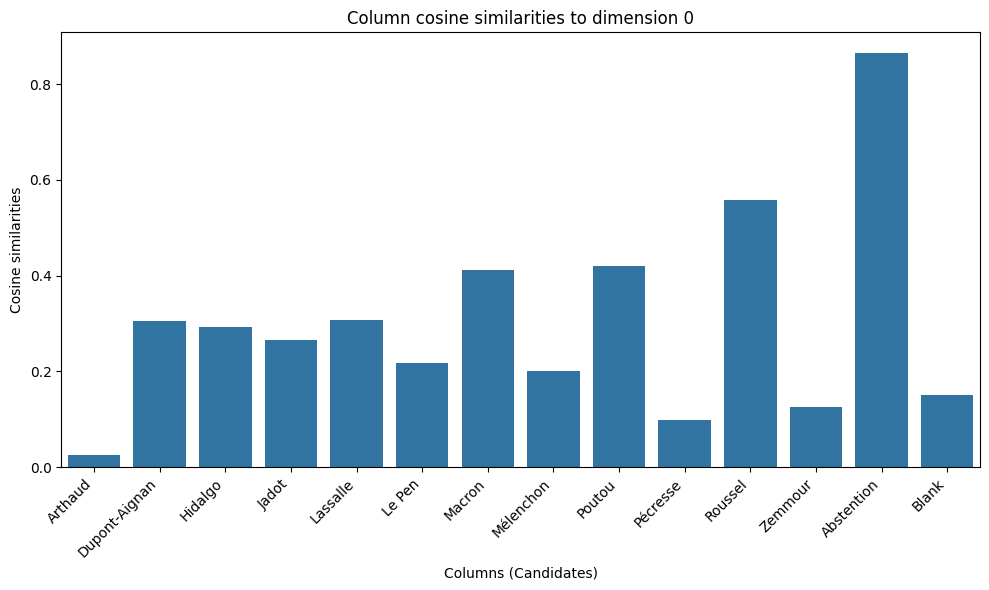

In [92]:
col_cosc= ca.column_cosine_similarities(dataset)

# Plot the bar chart of the column cosine similarities
plt.figure(figsize=(10, 6))
sns.barplot(x=col_cosc[0].index, y=col_cosc[0].values)
plt.title('Column cosine similarities to dimension 0')
plt.xlabel('Columns (Candidates)')
plt.ylabel('Cosine similarities')
plt.xticks(rotation=45, ha='right') # Rotate the x labels for better readability
plt.tight_layout()
plt.show()

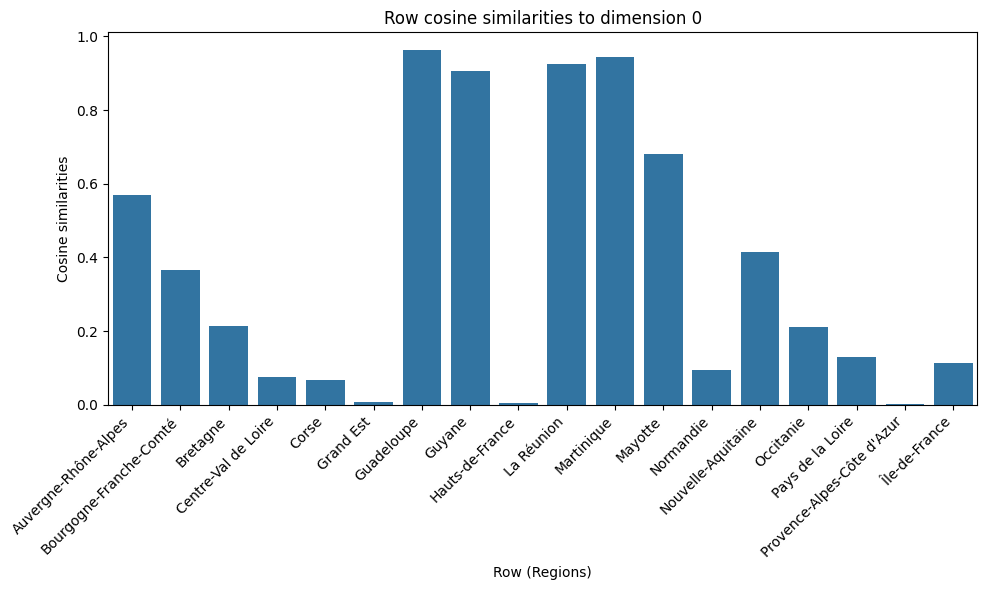

In [94]:
row_cosc = ca.row_cosine_similarities(dataset)

# Plot the bar chart of the column cosine similarities
plt.figure(figsize=(10, 6))
sns.barplot(x=row_cosc[0].index, y=row_cosc[0].values)
plt.title('Row cosine similarities to dimension 0')
plt.xlabel('Row (Regions)')
plt.ylabel('Cosine similarities')
plt.xticks(rotation=45, ha='right') # Rotate the x labels for better readability
plt.tight_layout()
plt.show()

## <a id='toc1_5_'></a>[Part 5: Conclusions & QA](#toc0_)

**Discuss how much variance is explained by the first two dimensions and the importance of each dimension.**

**Discuss how columns (candidates) and rows (regions) contribute to the factors and what the plot tells us about the relationship about the two variables.**

**Useful summary:**

The final output of Correspondence Analysis (CA) consists of several key components that help interpret the relationships between the rows and columns of a contingency table (i.e., categorical variables). These outputs typically include:

**1. Row Coordinates (Row Scores)**
These are the coordinates of the rows (e.g., regions, departments) in the reduced factor space. They show how each row is represented on the principal dimensions (factors) derived from the analysis. These coordinates can be plotted to visualize how different rows are positioned relative to each other, indicating similarities or differences between the categories.

**2. Column Coordinates (Column Scores)**
These are the coordinates of the columns (e.g., candidates, categories) in the reduced factor space. Similar to row coordinates, they represent how each column relates to the principal dimensions. These scores can also be visualized on a scatter plot alongside the row coordinates, showing relationships between rows and columns.

**3. Eigenvalues and Explained Inertia**
Eigenvalues represent the amount of inertia (variance) captured by each dimension. Higher eigenvalues indicate dimensions that explain more of the association in the data. Explained inertia is the proportion of the total inertia (variance) explained by each dimension. It helps assess how much information is captured by the first few dimensions and determines the optimal number of dimensions to keep.

**4. Row Contributions**
The contribution of each row to the total inertia of a given dimension. This helps identify which rows (categories) are most responsible for the formation of each dimension.

**5. Column Contributions**
The contribution of each column to the total inertia of a dimension. This shows which columns (categories) have the greatest influence on a specific dimension.

**6. Row and Column Masses**
Row masses represent the relative importance (weight) of each row in the contingency table. Column masses represent the relative importance of each column. These masses are used in normalization during CA to account for uneven distributions.

**7. Factor Maps (Biplots)**
These are visual representations of the row and column coordinates on the first two or more dimensions. The row factor map shows the distribution of rows in the reduced space, while the column factor map shows the positioning of columns. A biplot can display both row and column coordinates on the same graph, showing the associations between rows and columns in the reduced dimensional space.